In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
usda = json.load(open('./src/usda_food.json'))

In [9]:
usda[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [11]:
usda[0]['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [12]:
pd.DataFrame(usda[0]['nutrients'])

,value,units,description,group
0,25.180,g,Protein,Composition
1,29.200,g,Total lipid (fat),Composition
2,3.060,g,"Carbohydrate, by difference",Composition
3,3.280,g,Ash,Other
4,376.000,kcal,Energy,Energy
...,...,...,...,...
157,1.472,g,Serine,Amino Acids
158,93.000,mg,Cholesterol,Other
159,18.584,g,"Fatty acids, total saturated",Other
160,8.275,g,"Fatty acids, total monounsaturated",Other


In [58]:
foods = pd.DataFrame(usda, columns=['id', 'description', 'manufacturer', 'group'])
foods

,id,description,manufacturer,group
0,1008,"Cheese, caraway",,Dairy and Egg Products
1,1009,"Cheese, cheddar",,Dairy and Egg Products
2,1018,"Cheese, edam",,Dairy and Egg Products
3,1019,"Cheese, feta",,Dairy and Egg Products
4,1028,"Cheese, mozzarella, part skim milk",,Dairy and Egg Products
...,...,...,...,...
6631,42161,"Bologna, beef, low fat",,Sausages and Luncheon Meats
6632,42173,"Turkey and pork sausage, fresh, bulk, patty or...",,Sausages and Luncheon Meats
6633,43408,"Babyfood, juice, pear",None,Baby Foods
6634,43539,"Babyfood, dessert, banana yogurt, strained",None,Baby Foods


In [26]:
foods['group'].value_counts()

group
Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Beverages                            278
Soups, Sauces, and Gravies           275
Finfish and Shellfish Products       255
Baby Foods                           209
Cereal Grains and Pasta              183
Ethnic Foods                         165
Snacks                               162
Nut and Seed Products                128
Poultry Products                     116
Sausages and Luncheon Meats          111
Dairy and Egg Products               107
Fats and Oils                         97
Meals, Entrees, and Sidedishes        57
Restaurant Foods                      51
Spices and

In [80]:
nutrients = pd.DataFrame(usda, columns=['nutrients'])

def contains_protein(lst):
    for d in lst:
        if d['description'] == 'Protein':
            return True
    return False

protein = nutrients[nutrients['nutrients'].apply(contains_protein)]
protein

,nutrients
0,"[{'value': 25.18, 'units': 'g', 'description':..."
1,"[{'value': 24.9, 'units': 'g', 'description': ..."
2,"[{'value': 4.22, 'units': 'g', 'description': ..."
3,"[{'value': 5.2, 'units': 'g', 'description': '..."
4,"[{'value': 3.27, 'units': 'g', 'description': ..."
...,...
6631,"[{'value': 11.8, 'units': 'g', 'description': ..."
6632,"[{'value': 22.7, 'units': 'g', 'description': ..."
6633,"[{'value': 0.0, 'units': 'g', 'description': '..."
6634,"[{'value': 1.1, 'units': 'g', 'description': '..."


In [87]:
foods = pd.DataFrame(usda, columns=['id', 'group'])
foods

,id,group
0,1008,Dairy and Egg Products
1,1009,Dairy and Egg Products
2,1018,Dairy and Egg Products
3,1019,Dairy and Egg Products
4,1028,Dairy and Egg Products
...,...,...
6631,42161,Sausages and Luncheon Meats
6632,42173,Sausages and Luncheon Meats
6633,43408,Baby Foods
6634,43539,Baby Foods


# 답안

In [92]:
lst = []
for i in usda:
    df = pd.DataFrame(i['nutrients'], columns=['value', 'description', 'id'])
    df['id'] = i['id']
    lst.append(df)
nutrients = pd.concat(lst)
nutrients

,value,description,id
0,25.180,Protein,1008
1,29.200,Total lipid (fat),1008
2,3.060,"Carbohydrate, by difference",1008
3,3.280,Ash,1008
4,376.000,Energy,1008
...,...,...,...
45,0.000,"Vitamin B-12, added",43546
46,0.000,Cholesterol,43546
47,0.072,"Fatty acids, total saturated",43546
48,0.028,"Fatty acids, total monounsaturated",43546


In [93]:
tmp = pd.merge(nutrients, foods, on='id', how='outer')
tmp

,value,description,id,group
0,25.180,Protein,1008,Dairy and Egg Products
1,29.200,Total lipid (fat),1008,Dairy and Egg Products
2,3.060,"Carbohydrate, by difference",1008,Dairy and Egg Products
3,3.280,Ash,1008,Dairy and Egg Products
4,376.000,Energy,1008,Dairy and Egg Products
...,...,...,...,...
389350,0.000,"Vitamin B-12, added",43546,Baby Foods
389351,0.000,Cholesterol,43546,Baby Foods
389352,0.072,"Fatty acids, total saturated",43546,Baby Foods
389353,0.028,"Fatty acids, total monounsaturated",43546,Baby Foods


<Axes: ylabel='group'>

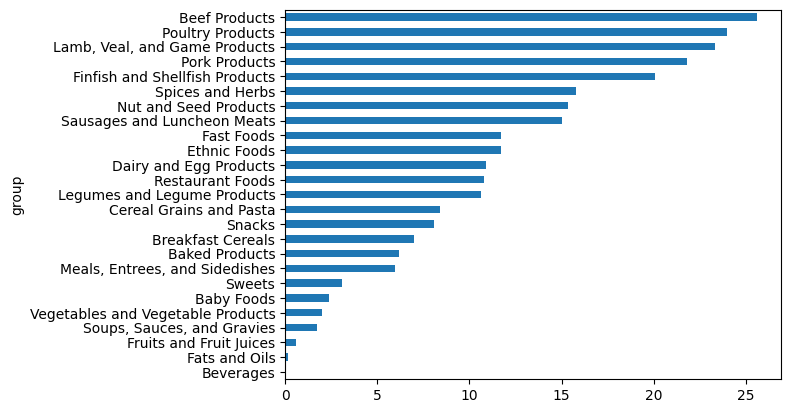

In [99]:
protein = tmp.groupby(['description', 'group'])['value'].median()['Protein']
protein.sort_values().plot(kind='barh')

# 다른 방법

In [103]:
pt = tmp.pivot_table('value', index='group', columns='description', aggfunc='median')
pt['Protein']

group
Baby Foods                            2.370
Baked Products                        6.155
Beef Products                        25.610
Beverages                             0.070
Breakfast Cereals                     7.000
Cereal Grains and Pasta               8.410
Dairy and Egg Products               10.900
Ethnic Foods                         11.700
Fast Foods                           11.730
Fats and Oils                         0.160
Finfish and Shellfish Products       20.080
Fruits and Fruit Juices               0.605
Lamb, Veal, and Game Products        23.320
Legumes and Legume Products          10.620
Meals, Entrees, and Sidedishes        5.980
Nut and Seed Products                15.360
Pork Products                        21.785
Poultry Products                     23.955
Restaurant Foods                     10.770
Sausages and Luncheon Meats          15.000
Snacks                                8.100
Soups, Sauces, and Gravies            1.720
Spices and Herbs          

In [109]:
tmp[tmp['description'] == 'Protein'].groupby('group')['value'].median()

group
Baby Foods                            2.370
Baked Products                        6.155
Beef Products                        25.610
Beverages                             0.070
Breakfast Cereals                     7.000
Cereal Grains and Pasta               8.410
Dairy and Egg Products               10.900
Ethnic Foods                         11.700
Fast Foods                           11.730
Fats and Oils                         0.160
Finfish and Shellfish Products       20.080
Fruits and Fruit Juices               0.605
Lamb, Veal, and Game Products        23.320
Legumes and Legume Products          10.620
Meals, Entrees, and Sidedishes        5.980
Nut and Seed Products                15.360
Pork Products                        21.785
Poultry Products                     23.955
Restaurant Foods                     10.770
Sausages and Luncheon Meats          15.000
Snacks                                8.100
Soups, Sauces, and Gravies            1.720
Spices and Herbs          